# Measuring a room with a golf ball

We want to measure the height of the room we are in, but all we have to hand are a regulation golf ball, python and all the cleverness we can bring to bear.

## Beast mode question!
Older students should have a working knowledge of physics including how things move under gravity. Give them no explanation.

Ask them to open the Voice Recorder app in windows. When they are all ready and recording, hold the golf ball to the ceiling and let it drop. Once it has bounced a several times, catch it, and ask how tall the room is.

## FAQ
1. The recording doesn't indicate when the ball was initially released.  
Yes. That was on purpose.
2. The ball would be affected by air resistance/uneven bounciness/floor covering.  
Yes. What other assumptions have we made? How can these be reasonably controlled? We can code a solver based on the data we already have, and gather improved data to use with it next time.

## Taming the beast
If the student can't see how to dissect the problem, ask the following easier questions.

How high did the ball bounce first time? The recording does tell us when it hit the ground for the first and second time so we can use that to work out how long the ball was in the air for and so work out how high it went.

How high did the ball bounce second time? How much less did it bounce?

These questions should be easier to tackle and will guide the student to seeing how to work out how far the ball originally fell for.

## Modelling the problem

The ball starts at the ceiling with the potential energy it gained by being lifted by the experimenter. As it falls that potential energy is transformed into kinetic energy. It will then hit the ground and lose energy to sound and to the ball itself deforming, then it will bounce up to a lesser height than before.

This can be modelled with the program below. Note that for the demonstration we have assumed that the height of the room is 3m and the bounciness of the ball is 0.75.

Ball hit the ground at 0.782 seconds
Ball hit the ground at 1.957 seconds
Ball hit the ground at 2.840 seconds
Ball hit the ground at 3.504 seconds
Ball hit the ground at 4.003 seconds
Ball hit the ground at 4.378 seconds
Ball hit the ground at 4.660 seconds
Ball hit the ground at 4.872 seconds
Ball hit the ground at 5.032 seconds
Ball hit the ground at 5.153 seconds
Stopped simulation at t=5.154


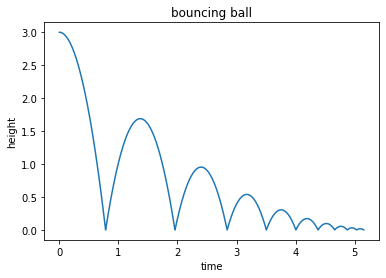

In [14]:
from math import sqrt
import matplotlib.pyplot as plt
#matplotlib inline

#about the world
gravity = 9.8         # m/s/s

#about the room
room_height = 3       # m

#about the ball
velocity = 0          # m/s
bounciness = 0.75     # how bouncy is the ball
height = room_height

#about the simulation
time = 0          
time_step = 0.001
bounces = 0
maximum_bounces = 10

#Lists to collect the data points we work out
H = []
T = []

#run the simulation
while(bounces < maximum_bounces):
    next_height = height + velocity*time_step
    
    if(next_height<=0):
        #the ball has hit the ground
        height = 0
        velocity = -1 * velocity * bounciness
        bounces = bounces + 1
        print(f"Ball hit the ground at {time:.3f} seconds")
    else:
        #the ball is still falling
        velocity = velocity - gravity*time_step
        height = next_height
    
    time = time + time_step
    H.append(height)
    T.append(time)

print(f"Stopped simulation at t={time:.3f}")

#plot the simulation
plt.figure()
plt.plot(T, H)
plt.xlabel('time')
plt.ylabel('height')
plt.title('bouncing ball')
plt.show()

## How bouncy is the ball?

The ratio of the time between the first and second bounce and the second and third bounce tells us how bouncy the ball is. In the example above the ball hits the ground for the first time at 1.010s after being dropped. It lands for the second time at 2.625s and for the third time at 3.862s. Note that the first fall is short because it's only measuring the drop, not the bounce and drop.

From those times we can work out how long the first and second complete bounces took, and from that work out a value for how bouncy the ball is.

In [15]:
first_bounce = 0.782
second_bounce = 1.957
third_bounce = 2.840

first_flight = second_bounce - first_bounce
second_flight = third_bounce - second_bounce

bounciness = second_flight / first_flight

print(f"The ball has a bounciness value of {bounciness:.3f}")

The ball has a bounciness value of 0.751


## How high does the ball bounce?

We can use the fact that all objects fall at the same rate under gravity. The ball spends half the time between bounces in free fall and the formula for how far an object falls under gravity over time is: $$distance fallen = \frac{1}{2} * gravity * time^2$$

Since we know it spends half the time in freefall we can reuse the times calculated above to work out how high it went on each bounce

In [16]:
def get_bounce_height(bounce_time):
    freefall_time = bounce_time/2
    return 1/2 * gravity * freefall_time**2

first_bounce_height = get_bounce_height(first_flight)
second_bounce_height = get_bounce_height(second_flight)

bounciness = second_bounce_height / first_bounce_height

print(f"The original height was {first_bounce_height/bounciness:.3f}")

The original height was 2.995


## Recording data from the experiment

There are a few options for getting the bounce times from the recording. The simplest would be to write a program that notes the time whenever the return key is pressed. The students can replay the recording and press return when they hear the ball bounce.

In [25]:
import time

times = []
for _ in range(4):
    input("Press return when the ball hits the ground")
    t = time.time() #returns the current time in seconds. Numbers after the decimal are fractions of a second
    print(f"time is {t}")
    times.append(t)

flights = [t2 - t1 for t1,t2 in zip(times, times[1:])]
heights = [get_bounce_height(f) for f in flights]
rhos = [h2/h1 for h1,h2 in zip(heights, heights[1:])]

print(f"The flight times were {flights}")
print(f"The bounce heights were {heights}")
print(f"The bounciness values were {rhos}")
print(f"The starting height was {heights[0]/rhos[0]:.3f}")

Press return when the ball hits the ground 


time is 1583783451.8128846


Press return when the ball hits the ground 


time is 1583783452.9472766


Press return when the ball hits the ground 


time is 1583783453.932362


Press return when the ball hits the ground 


time is 1583783454.9137487
The flight times were [1.1343920230865479, 0.9850854873657227, 0.981386661529541]
The bounce heights were [1.576385446001929, 1.1887319363377402, 1.17982172979942]
The bounciness values were [0.7540871043643761, 0.9925044442182895]
The starting height was 2.090


## Processing the recording

The method above is quick and easy, but suffers from human error to press the return key accurately. Perhaps with a few attempts the student could get a good answer, but a better option would be to get the computer to extract timing data from the recording.

Direct them to the Wave module for processing the sound and tell them to look up the "root mean square" function to calculate the volume of any chunk of sound. The ball bouncing will be the loudest thing in the recording and they should be able to extract the impacts fairly easily.

The Windows voice recorder records as m4a files rather than wav files so they will need to convert their recording before they can process it or find another python module that can process m4a files.

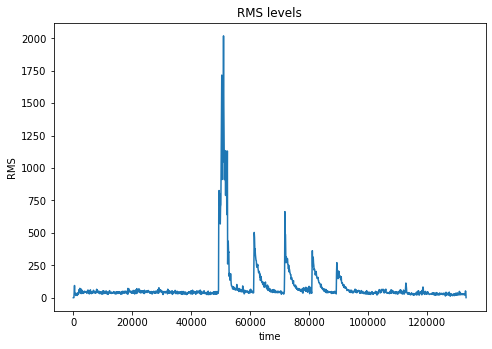

In [18]:
import math
import struct
import wave

SAMPLES_PER_SECOND = 100

#function to unpack the wav data
def unpack_wav(block):
    # we will get one short out for each 
    # two chars in the string.
    count = len(block)/2
    format = "%dh"%(count)
    shorts = struct.unpack( format, block )
    return shorts

#function to calculate the RMS of a data block
def get_rms(block):
    # iterate over the block.
    sum_squares = 0.0
    count = len(block)
    for sample in block:
        sum_squares += sample**2

    return math.sqrt( sum_squares / count )

def get_blocks_from_wav(wavfile):

    # open the file for reading.
    wf = wave.open(wavfile, 'rb')

    # getframerate tells us the bits per second. Divide by ten to get a sample every tenth of a second
    block_size = int(wf.getframerate()/SAMPLES_PER_SECOND)

    # read data (based on the block size)
    data = wf.readframes(block_size)

    while data != '':
        try:
            block = unpack_wav(data)
            if len(block) == 0:
                data = ''
            else:
                yield block
                data = wf.readframes(block_size)
        except:
            raise StopIteration

def get_rms_from_wav(wavfile):
    volume = []
    for block in get_blocks_from_wav(wavfile):
        if len(block) > 0:
            volume.append(get_rms(block))
    return volume

volume = get_rms_from_wav('Dropped golf ball.wav')

#plot the rms data so we can double check the results
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
x = np.arange(0,len(volume)*SAMPLES_PER_SECOND,SAMPLES_PER_SECOND)
y = np.array(volume)
ax = fig.add_axes([0,0,1,1])
ax.plot(x, y)
ax.set_title("RMS levels")
ax.set_xlabel("time")
ax.set_ylabel("RMS")
plt.show()

The sample recording has five clicks in it which we can see on the chart. We can extract the times when the volume was over a certain limit to work out when the clicks are and work back from there.

In [26]:
timestamp = 0
impacts = []
mid_hit = False
IMPACT_TRIGGER_VOLUME = 200
IMPACT_COMPLETE_VOLUME = 100

for v in volume:
    timestamp += 1
    if not mid_hit and v > IMPACT_TRIGGER_VOLUME:
        impacts.append(timestamp/SAMPLES_PER_SECOND)
        mid_hit = True
    if mid_hit and v < IMPACT_COMPLETE_VOLUME:
        mid_hit = False

flights = [i2 - i1 for i1, i2 in zip(impacts,impacts[1:])]
heights = [get_bounce_height(f) for f in flights]
rhos = [h2/h1 for h1,h2 in zip(heights, heights[1:])]

print(f"The impacts were at {impacts}")
print(f"The flight times were {flights}")
print(f"The bounce heights were {heights}")
print(f"The bounciness values were {rhos}")
print(f"The starting height was {heights[0]/rhos[0]:.3f}")

The impacts were at [4.94, 6.13, 7.18, 8.1, 8.94]
The flight times were [1.1899999999999995, 1.0499999999999998, 0.9199999999999999, 0.8399999999999999]
The bounce heights were [1.7347224999999986, 1.3505624999999997, 1.0368399999999998, 0.8643599999999998]
The bounciness values were [0.7785467128027685, 0.7677097505668934, 0.833648393194707]
The starting height was 2.228


## In conclusion

The ball was dropped from 2.32m and is 0.042m in diameter. How does this compare to the final result? How could the experiment be reasonably improved?
